<a href="https://colab.research.google.com/github/bbdvin007/bbd-vin-blog/blob/master/income_census_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uploaded = files.upload()

Saving income_Adult.csv to income_Adult.csv


In [5]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['income_Adult.csv']))
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [7]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'income_>50K']
numerical_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [8]:
object_columns = [col for col in df.columns if (df[col].dtype== 'object') and col != 'income_>50K']
object_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [11]:
len(numerical_columns)

6

Male (% to exit) :  30.37
Female (% to exit) :  10.92


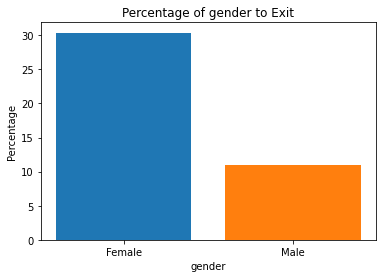

In [12]:
percentages = []
for gen in list(df["gender"].unique()):
    
    p = round((df["income_>50K"][df["gender"]==gen].value_counts()[1]/df["income_>50K"][df["gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.xticks((0,1), ('Female','Male'))
plt.xlabel("gender")
plt.ylabel("Percentage")
plt.title("Percentage of gender to Exit")
plt.show()

White (% to exit) :  25.38
Black (% to exit) :  12.42
Asian-Pac-Islander (% to exit) :  26.73
Other (% to exit) :  11.8
Amer-Indian-Eskimo (% to exit) :  11.4


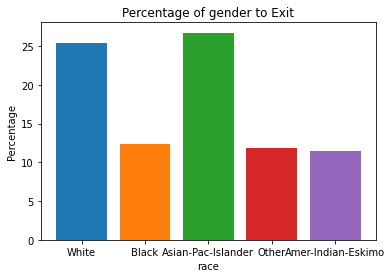

In [13]:
percentages = []
for gen in list(df["race"].unique()):
    
    p = round((df["income_>50K"][df["race"]==gen].value_counts()[1]/df["income_>50K"][df["race"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.bar(2, percentages[2])
plt.bar(3, percentages[3])
plt.bar(4, percentages[4])
plt.xticks((0,1, 2, 3, 4), ('White','Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'))
plt.xlabel("race")
plt.ylabel("Percentage")
plt.title("Percentage of gender to Exit")
plt.show

In [33]:
# ['workclass',
#  'education',
#  'marital-status',
#  'occupation',
#  'relationship',
#  'race',
#  'gender',
#  'native-country']

# country_count = df['native-country'].value_counts()
# country_count


Text(0.5, 1.0, 'Total adults from each Country')

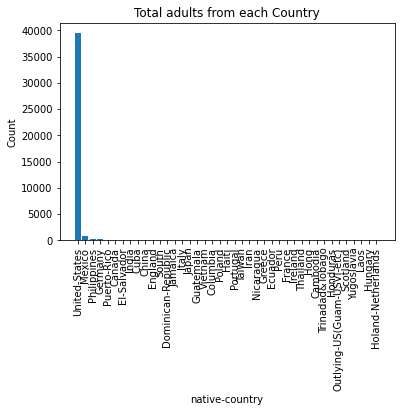

In [32]:
country_count = df['native-country'].value_counts()
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('native-country')
plt.ylabel('Count')
plt.title('Total adults from each Country')

Text(0.5, 1.0, 'relationships ')

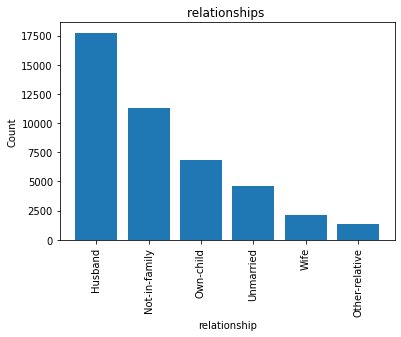

In [34]:
rel_count = df['relationship'].value_counts()
plt.bar(rel_count.index, rel_count.values)
plt.xticks(rotation = 90)
plt.xlabel('relationship')
plt.ylabel('Count')
plt.title('relationships ')

Text(0.5, 1.0, 'occupations ')

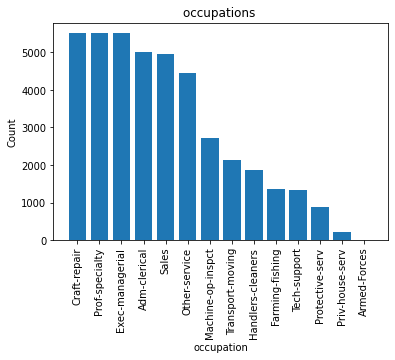

In [35]:
occupation_count = df['occupation'].value_counts()
plt.bar(occupation_count.index, occupation_count.values)
plt.xticks(rotation = 90)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('occupations ')

Text(0.5, 1.0, 'marital-status')

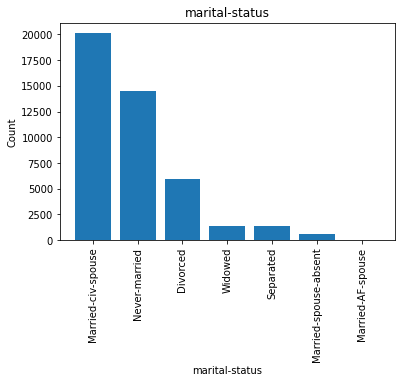

In [36]:
marital_status_count = df['marital-status'].value_counts()
plt.bar(marital_status_count.index, marital_status_count.values)
plt.xticks(rotation = 90)
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.title('marital-status')

Text(0.5, 1.0, 'education')

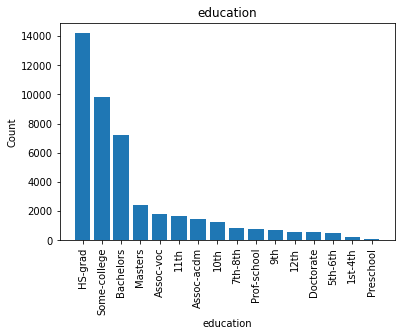

In [37]:
education_count = df['education'].value_counts()
plt.bar(education_count.index, education_count.values)
plt.xticks(rotation = 90)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('education')

Text(0.5, 1.0, 'workclass')

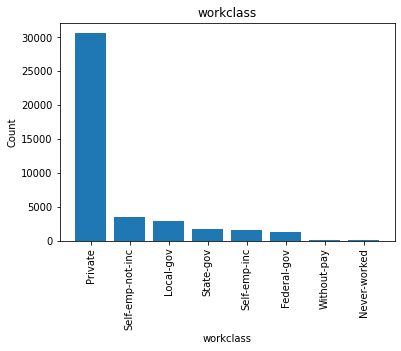

In [38]:
workclass_count = df['workclass'].value_counts()
plt.bar(workclass_count.index, workclass_count.values)
plt.xticks(rotation = 90)
plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('workclass')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00935e7450>,
      dtype=object)

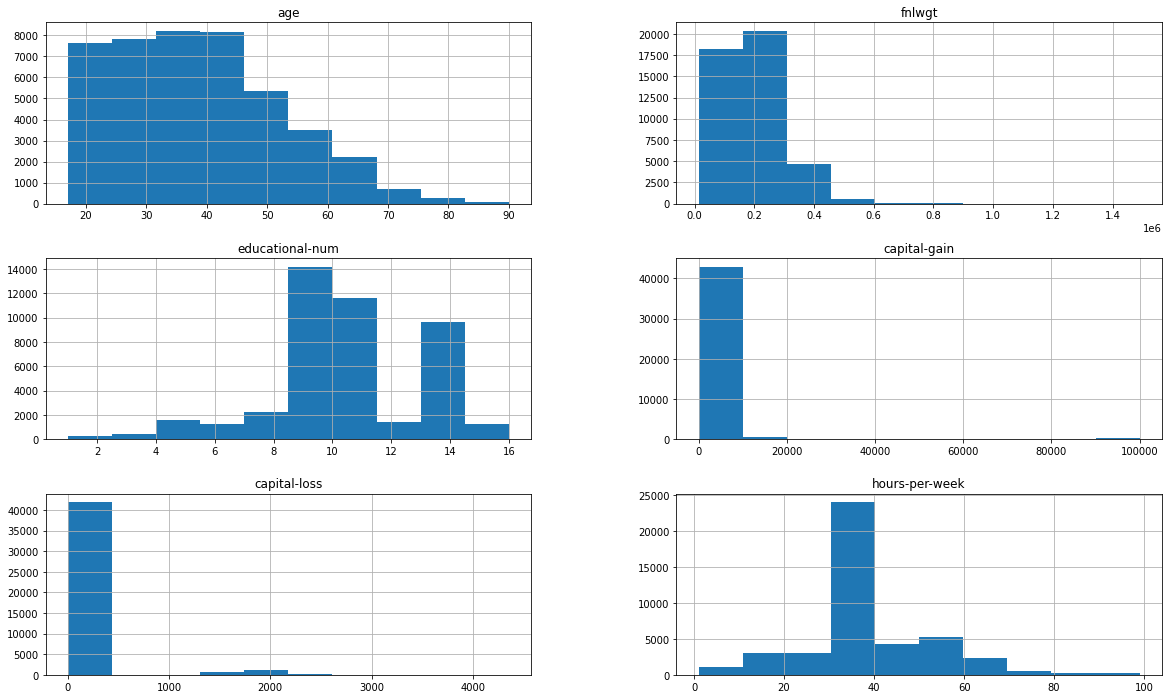

In [40]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 12
df[['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']
].hist()

In [43]:
capital_count = df['capital-gain'].value_counts()


In [46]:
age_bucket = df.groupby(pd.cut(df["age"],bins=[10,20,30,40,50,60,70,80,90,100]))
age_bucket = round((age_bucket.sum()["income_>50K"] / age_bucket.size())*100 , 2)

In [54]:
educational_num_bucket = df.groupby(pd.cut(df["educational-num"],bins=[0, 2, 4, 6, 8, 10, 12, 14, 16]))
educational_num_bucket = round((educational_num_bucket.sum()["income_>50K"] /educational_num_bucket.size())*100 , 2)

In [53]:
educational_num_bucket

educational-num
(0, 2]       2.68
(2, 4]       6.24
(4, 6]       6.15
(6, 8]       5.73
(8, 10]     16.98
(10, 12]    26.05
(12, 14]    44.92
(14, 16]    72.82
(16, 18]      NaN
(18, 20]      NaN
dtype: float64

In [55]:
hours_bucket = df.groupby(pd.cut(df["hours-per-week"],bins=[0, 2, 4, 6, 8, 10, 12, 14, 16]))
hours_bucket = round((hours_bucket.sum()["income_>50K"] /hours_bucket.size())*100 , 2)
hours_bucket

hours-per-week
(0, 2]      19.74
(2, 4]       5.43
(4, 6]       8.09
(6, 8]      10.87
(8, 10]      7.89
(10, 12]     5.83
(12, 14]     6.49
(14, 16]     5.70
dtype: float64

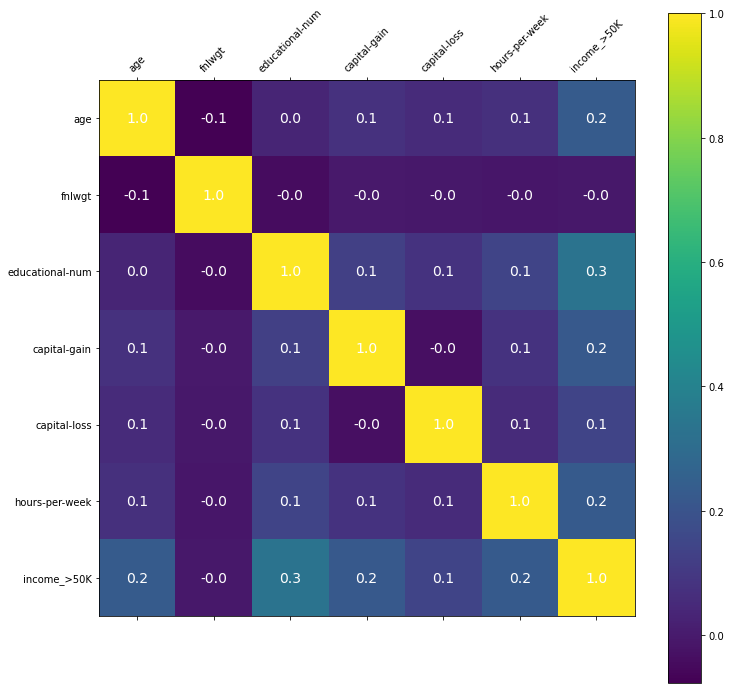

In [57]:
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [58]:
df.drop(['fnlwgt'], axis = 1, inplace = True)
df = df.drop(df[df['workclass'] == 'Without-pay'].index)
df = df.drop(df[df['workclass'] == 'Never-worked'].index)

df.drop(['educational-num'], axis = 1, inplace = True)
df['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)


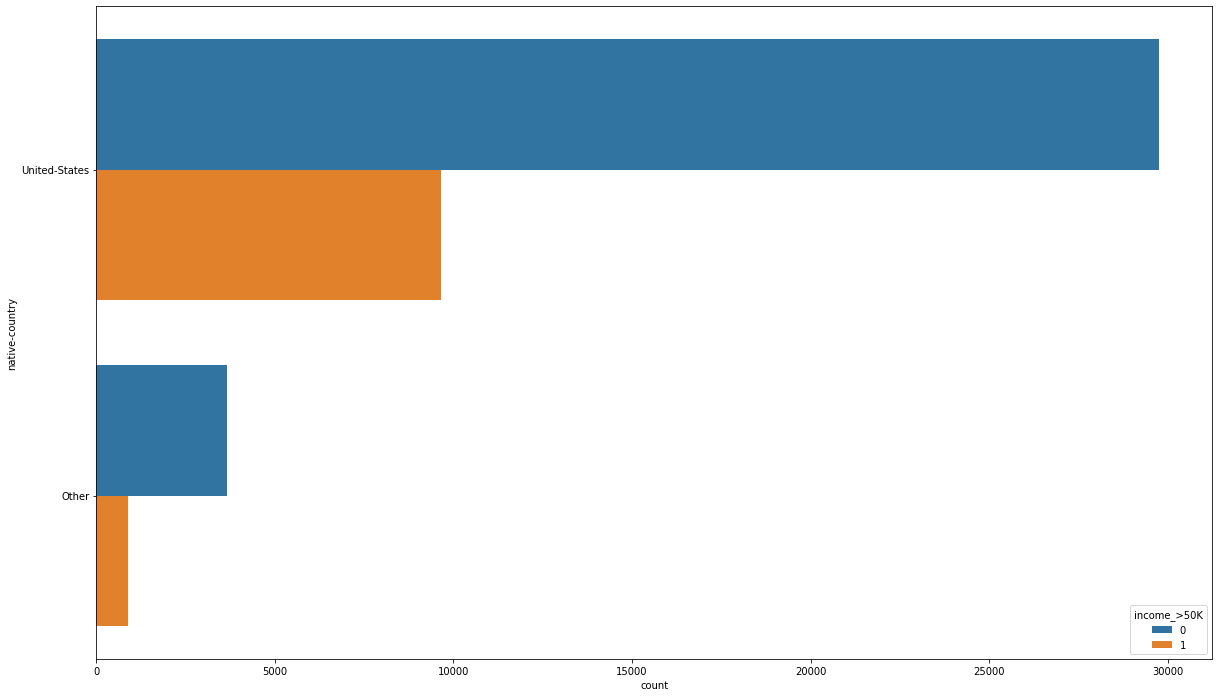

In [60]:
import seaborn as sns


countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)

df['native-country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'native-country', hue = 'income_>50K', data = df)


In [61]:
y = df['income_>50K']
X = df.drop(['income_>50K'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 62


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [63]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [64]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [65]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.65
Support Vector Classifier:
F1 score: 0.39
Decision Tree Classifier:
F1 score: 0.60
Random Forest Classifier:
F1 score: 0.65
Gradient Boosting Classifier:
F1 score: 0.67
